In [1]:
import pandas
import numpy as np
import matplotlib.pyplot as plt

In [2]:
CPS=pandas.read_csv("churn_prediction_simple.csv")
CPS.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,0,0.0,0,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,6,2531,42,0,2.0,0,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1
2,7,263,42,1,0.0,0,1096.0,2,1666,60.0,...,16059.34,15211.29,13798.82,0.36,0.36,857.50,286.07,15719.44,15349.75,0
3,8,5922,72,0,0.0,1,1020.0,1,1,98.0,...,7714.19,7859.74,11232.37,0.64,0.64,1299.64,439.26,7076.06,7755.98,0
4,9,1145,46,0,0.0,0,623.0,2,317,172.0,...,8519.53,6511.82,16314.17,0.27,0.27,443.13,5688.44,8563.84,5317.04,0


In [3]:
CPS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22067 entries, 0 to 22066
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   customer_id                     22067 non-null  int64  
 1   vintage                         22067 non-null  int64  
 2   age                             22067 non-null  int64  
 3   gender                          22067 non-null  int64  
 4   dependents                      22067 non-null  float64
 5   occupation                      22067 non-null  int64  
 6   city                            22067 non-null  float64
 7   customer_nw_category            22067 non-null  int64  
 8   branch_code                     22067 non-null  int64  
 9   days_since_last_transaction     22067 non-null  float64
 10  current_balance                 22067 non-null  float64
 11  previous_month_end_balance      22067 non-null  float64
 12  average_monthly_balance_prevQ   

## Basic Preprocessing:

In [4]:
X= CPS.drop(columns=['customer_id', 'churn'])
Y= CPS['churn']

In [5]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_X=scaler.fit_transform(X)

In [6]:
from sklearn.model_selection import train_test_split as tts
x_train, x_test, y_train, y_test = tts(scaled_X, Y, train_size=0.8, stratify=Y)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((17653, 19), (4414, 19), (17653,), (4414,))

# Decision Tree

In [7]:
from sklearn.tree import DecisionTreeClassifier as DTC
classifier=DTC(class_weight="balanced")
classifier=DTC()

In [8]:
classifier.fit(x_train, y_train)
pred=classifier.predict(x_train)
pred

array([0, 1, 0, ..., 0, 1, 1], dtype=int64)

##### Model performance on train set:

In [9]:
from sklearn.metrics import classification_report
print(classification_report(y_train, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14234
           1       1.00      1.00      1.00      3419

    accuracy                           1.00     17653
   macro avg       1.00      1.00      1.00     17653
weighted avg       1.00      1.00      1.00     17653



##### Model performance on test set:

In [10]:
pred2=classifier.predict(x_test)
print(classification_report(y_test, pred2))

              precision    recall  f1-score   support

           0       0.86      0.85      0.86      3559
           1       0.42      0.44      0.43       855

    accuracy                           0.77      4414
   macro avg       0.64      0.65      0.64      4414
weighted avg       0.78      0.77      0.78      4414



##### This model does not perform well in the test set even though it performs perfectly in the train set. Therefore, the model is overfitting

# Visualizing Decision Tree

In [13]:
!pip install graphviz

You should consider upgrading via the 'c:\users\hp\appdata\local\programs\python\python38-32\python.exe -m pip install --upgrade pip' command.


##### Create an intermediary file that contains info about the nodes and edges of any tree/graph:

In [11]:
from sklearn.tree import export_graphviz
export_graphviz(decision_tree = classifier, out_file='tree_viz', max_depth=None, feature_names=X.columns, 
                label=None, impurity=False)

##### Displaying:

In [14]:
from graphviz import render
render(filepath='tree_viz', format='png', engine='neato')

ExecutableNotFound: failed to execute ['neato', '-Tpng', '-O', 'tree_viz'], make sure the Graphviz executables are on your systems' PATH

# Hyperparameter Tuning

In [15]:
classifier=DTC()
classifier.fit(x_train, y_train)

DecisionTreeClassifier()

##### Function to calculate f1 scores w.r.t train and test sets:

In [16]:
from sklearn.metrics import f1_score

def calc_score(model, xtr, ytr, xts, yts):
    model.fit(xtr,ytr)
    predict=model.predict(xtr)
    f1=f1_score(ytr, predict)
    predict=model.predict(xts)
    f2=f1_score(yts, predict)
    return f1,f2

##### Function to plot the effects:

In [17]:
def effect(tr_score, ts_score, x_axis, title):
    plt.figure(dpi=120, figsize=(5,5))
    plt.plot(x_axis, tr_score, color="red", label="Train Score")
    plt.plot(x_axis, ts_score, color="blue", label="Test Score")
    plt.xlabel("parameter value")
    plt.ylabel("f1 score")
    plt.title(title)
    plt.legend()
    plt.show()

## Parameter 1: Max Depth (max_depth)

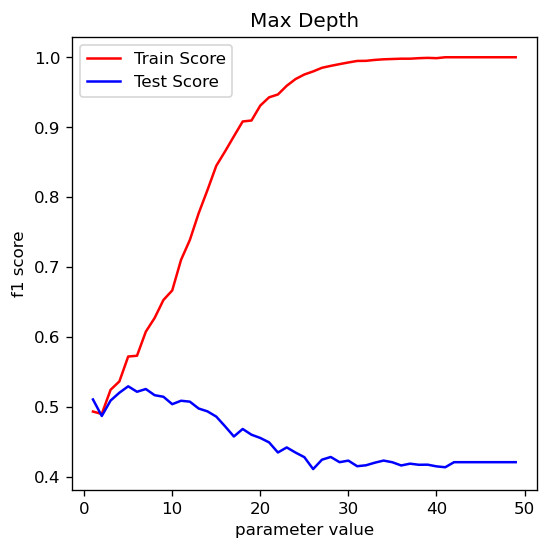

In [18]:
#Longest route between root node and any leaf node

maxdepth=[i for i in range(1,50)]
train=[]
test=[]

for i in maxdepth:
    model=DTC(class_weight="balanced", max_depth=i, random_state=42)
    f1, f2=calc_score(model, x_train, y_train, x_test, y_test)
    train.append(f1)
    test.append(f2)
    
effect(train, test, maxdepth, "Max Depth")

## Parameter 2: Minimum Sample Split (min_samples_split)

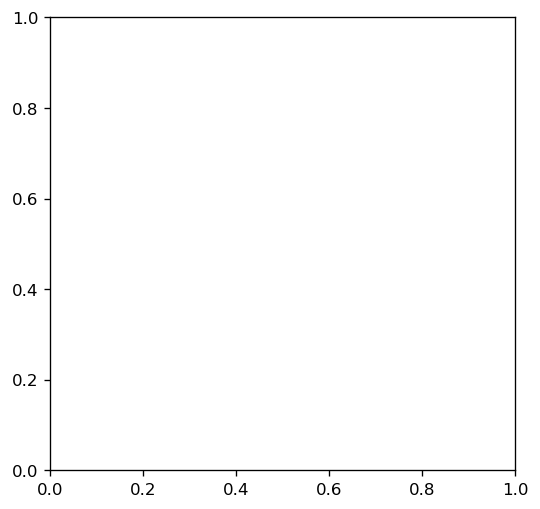

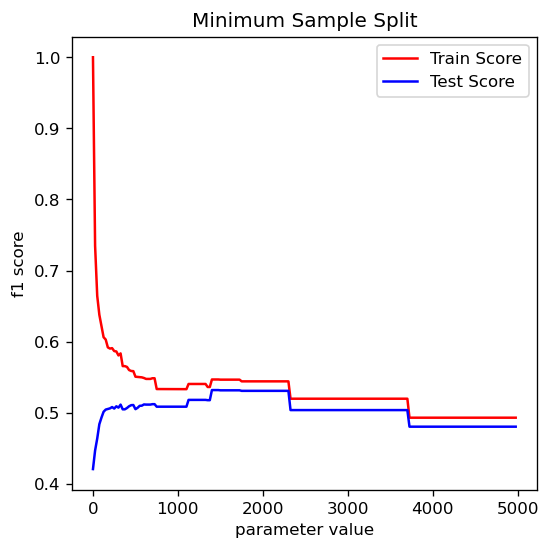

In [22]:
#Minimum required observations in any given node in order to split it

min_samples=[i for i in range(2, 5000, 25)]
train=[]
test=[]

for i in min_samples:
    model=DTC(class_weight="balanced", min_samples_split=i, random_state=42)
    f1, f2=calc_score(model, x_train, y_train, x_test, y_test)
    train.append(f1)
    test.append(f2)
    
effect(train, test, min_samples, "Minimum Sample Split")

# Parameter 3: Max Leaf Nodes (max_leaf_nodes)

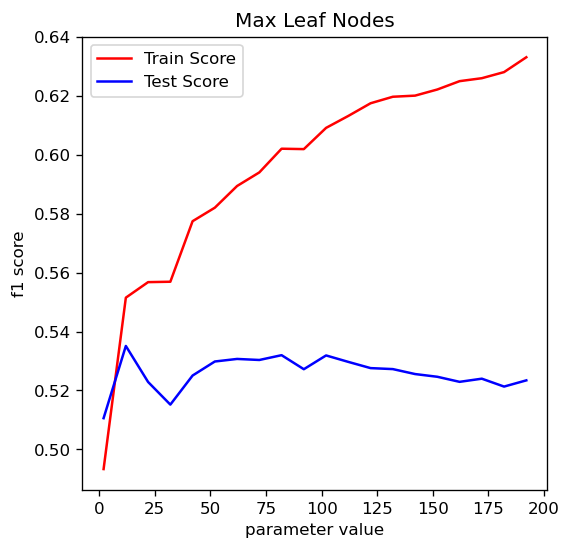

In [26]:
maxleafnodes=[i for i in range(2,200,10)]
train=[]
test=[]

for i in maxleafnodes:
    model=DTC(class_weight="balanced", max_leaf_nodes=i, random_state=42)
    f1, f2=calc_score(model, x_train, y_train, x_test, y_test)
    train.append(f1)
    test.append(f2)
    
effect(train, test, maxleafnodes, "Max Leaf Nodes")

# Parameter 4: Minimum Samples in Leaf (min_sample_leaf)

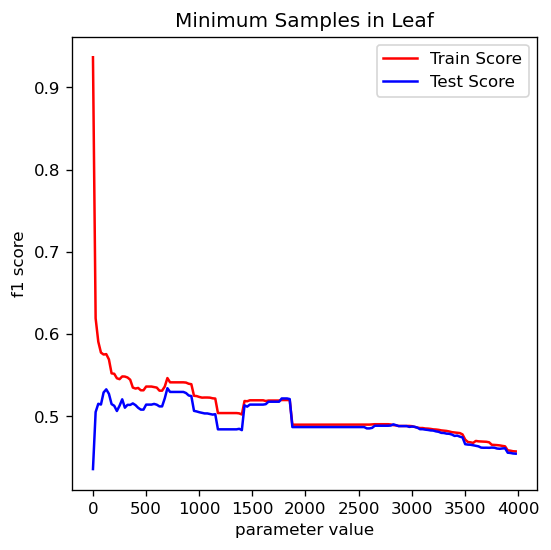

In [24]:
#minimum number of samples that should be present in a leaf after splitting

minsamplesleaf=[i for i in range(2,4000,25)]
train=[]
test=[]

for i in minsamplesleaf:
    model=DTC(class_weight="balanced", min_samples_leaf=i, random_state=42)
    f1, f2=calc_score(model, x_train, y_train, x_test, y_test)
    train.append(f1)
    test.append(f2)
    
effect(train, test, minsamplesleaf, "Minimum Samples in Leaf")

##### Always tune the parameters in the order that it is done in above, then choose the parameters so that the decision tree generalizes well

# Feature Importance

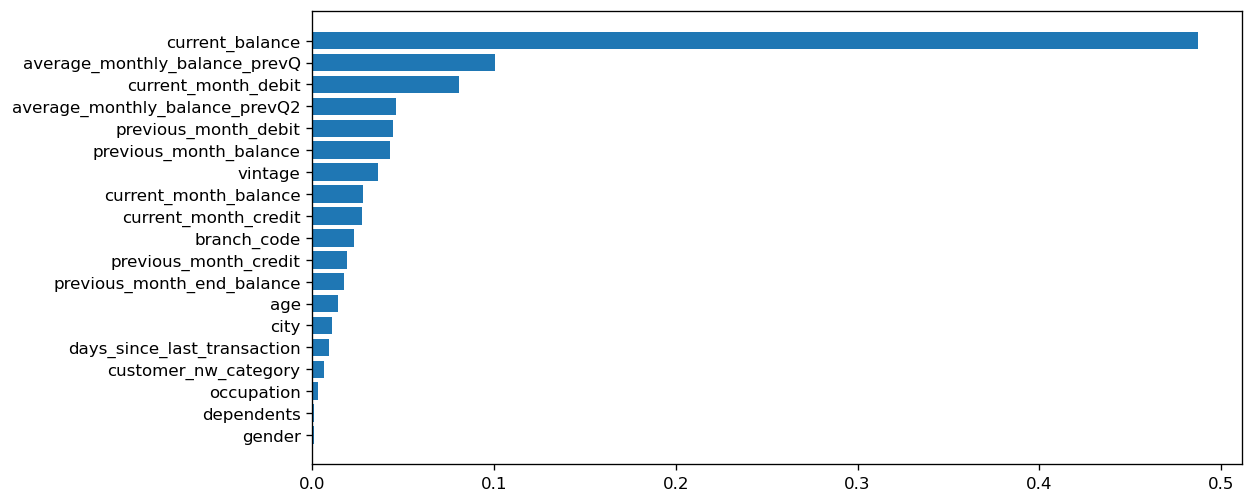

In [25]:
model=DTC(max_depth=9)
model.fit(x_train, y_train)
feature_imp=pandas.Series(model.feature_importances_, index=X.columns)
k=feature_imp.sort_values()

plt.figure(dpi=120, figsize=(10,5))
plt.barh(k.index, k)
plt.show()